In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
database_name = 'telecom'
table_name = 'xdr_data'

In [ ]:
connection_params = {'host': 'localhost', 'user': 'postgres',
                         'password': 'Postgresql', 'port': "5432",
                         'database': database_name }

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")


In [ ]:

# str or SQLAlchemy Select table (select or text object)
sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query, con= engine)

In [ ]:
df.shape

In [ ]:
df.info()

#### Task 2 - User overview analysis
For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams


In [ ]:
################################### PLOTTING FUNCTIONS ###################################

def top_10_handsets(data):
    data['Handset Type'].value_counts()[:10].plot.bar(figsize=(10, 5))
    plt.title(f'Top 10 Handsets used by the customers', size=15, fontweight='bold')
    plt.xlabel("Handsets Type", size=18); plt.ylabel("Usage Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

def top_3_manufacturers(data):
    data['Handset Manufacturer'].value_counts()[:3].plot.bar()
    plt.title(f'Top 3 Handset Manufacturers', fontweight= 'bold')
    plt.xlabel("Handset Manufacturers"); 
    plt.ylabel("Frequency");
    plt.show()



def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


#### Top 3 Handset Manufacturers

In [ ]:
top_3_manufacturers(df)

#### Top 10 Handsets used by customers

In [ ]:
top_10_handsets(df)

#### The top 5 handsets per top 3 handset manufacturer

In [ ]:
A = df.groupby(['Handset Manufacturer', 'Handset Type'])['Handset Type'].count().reset_index(name='Count')
C = A["Handset Type"].value_counts().rank(ascending = False)
D = df.groupby(['Handset Manufacturer'])['Handset Type'].value_counts().rank(ascending=False).reset_index(name='Count')
D

Task 2.1 - Your employer wants to have an overview of the users’ behaviour on those applications.   
- Aggregate per user the following information in the column  
  - number of xDR sessions
  - Session duration
  - the total download (DL) and upload (UL) data
  - the total data volume (in Bytes) during this session for each application


In [123]:
df.groupby(df['MSISDN/Number'])[['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']].sum()

,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,
3.360100e+10,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,8810.0,6.879252e+08,26716429.0,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0
3.379000e+10,140988.0,4.445751e+08,35732243.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0
3.197021e+12,877385.0,1.948281e+08,37295915.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0


### Task 2-2
#### Statistical Description of the data 

In [ ]:
df.describe()

Let's create a duration in seconds

In [ ]:
# create a copy of my data
dff = df.copy() 

# create new features by converting Bytes to MegaBytes
dff['Dur. (s)'] = df['Dur. (ms)'] / 1000
dff['Dur. (s)'].describe()

On average Customer used the network (uploading or downloading) for `105 sec` with a dispersion of `81 sec`. the highest duration a customer spent on the network is `1859 sec`. And the mininum time a customer spent on the network is `7 sec`

In [ ]:
# Duration

sns.displot(dff['Dur. (s)'], kde = True, color = 'red', bins =100)
plt.title("Duration Histogram ", fontweight='bold')
plt.xlabel('Duration in second', fontweight= 'bold')
plt.ylabel('Frequency', fontweight='bold')

plt.show()

In [ ]:
#plot_box(dff, dff['Dur. (s)'], "Duration Boxplot")

####

In [ ]:
sns.boxplot(dff['Dur. (s)'])
plt.title("BoxPlot of the Duration", fontweight='bold')
plt.show()

#### Univariate Analysis on Data Volume

In [ ]:
dff[['Total UL (MB)', 'Total DL (MB)']] = dff[['Total UL (Bytes)', 'Total DL (Bytes)']] / 1024 / 1024

dff[['Total UL (MB)', 'Total DL (MB)']].describe()

In [ ]:
#plot_hist(dff, dff["Total DL (MB)"], 'blue')
#plot_hist(dff, dff["Total UL (MB)"], 'green')

In [ ]:
sns.displot(dff['Total DL (MB)'], kde = True, color = 'blue')
plt.title("Total DL (MB) Distribution", fontweight= 'bold')
plt.xlabel("Total DL (MB)", fontweight= 'bold')
plt.show()

sns.displot(dff['Total UL (MB)'], kde = True, color = 'green')
plt.title("Total UL (MB) Distribution", fontweight= 'bold')
plt.xlabel("Total UL (MB)", fontweight= 'bold')
plt.show()


#### Bivariate Analysis

In [ ]:
# create df_num for numeric features
df_num = df.select_dtypes(exclude='object')
mat = df_num.corr()
sns.heatmap(mat)

This correlation matrix shows the correlation between numerical features in our data.
Hence, we can notice a strong positive correlation between Duration and Total UL and Total DL



In [ ]:
sns.scatterplot(data = df, x= dff["Total UL (MB)"], y= dff["Total DL (MB)"])
plt.title("Relationship between Total UL and Total DL", fontweight ='bold')
plt.xlabel("Total UL (MB)", fontweight ='bold')
plt.ylabel("Total DL (MB)", fontweight ='bold')
plt.show()

In [ ]:
#sns.catplot(data = df, x=df["Handset Type"], y =df["Total DL (MB)"])
#plt.show()

#### Handling missing values on the numerical data before Dimension Reduction.

In [ ]:
df_num.isnull().sum()

In [ ]:
# How many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing (df):
    # calculate total number of cells in dataframe
    totalCells = np.prod(df.shape)

    # count the number of missing values per column
    missingCount = df.isnull().sum()

    # Calcualte total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    missingPercentage = round(((totalMissing/totalCells)*100), 2)
    #print(f"The Telecom database contains {missingPercentage}% missing values")
    return missingPercentage

#print(f"The Telecom database contains {percent_missing (dff)}% of missing values")
print(f"The numerical data contains {percent_missing (df_num)}% of missing values")

#### Let's work on the missing values by evaluating the percentage of each feature. After that, order them. Finally, remove the ones above average 😉

In [ ]:
def missing_value_with_percentage(df):
    # converting the columns of our data into a list.
    missing = []
    col = df.columns.tolist()
    # add corresponding feature and missing value percentage into missing[]
    for i in col:
        missing.append((i, percent_missing(df[i])))

    missing_percent = pd.DataFrame(missing, columns = ['Features', 'MissingPercentage'])
    missing_sorted = missing_percent.sort_values(by='MissingPercentage', ascending=False)
    return missing_sorted

In [ ]:
# Display top 15 missing values
missing_sorted = missing_value_with_percentage(df_num)
missing_sorted.head(15)

In [ ]:
# keep columns with a missing percentage less or equal to 18%
useful_columns = missing_sorted[missing_sorted['MissingPercentage'] < 12 ]['Features'].tolist()
df_num = df_num[useful_columns]
df_num

In [ ]:
df_num.isnull().sum()

#### Drop the remaining missing values from our the numerical data

In [ ]:
df_num = df_num.dropna()
df_num.isnull().sum()

#### Let's keep the numerical variables

#### Dimension Reduction
Before keep the important features, let's scale our features.

After, we will use Principal Component Analysis for the dimension reduction.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

pca = PCA(0.95)  # Reach 95% of useful features
df_num_scaled_pca = pca.fit_transform(df_num_scaled)
df_num_scaled_pca.shape

In [ ]:
pca.components_.shape, df_num.shape

In [ ]:
feature_names = df_num.columns.tolist()
feature_names
components = pca.components_

# Assuming 'feature_names' is a list of your original feature names
for i, component in enumerate(components):
    print(f"Principal Component {i+1}:")
    for j, feature in enumerate(feature_names):
        print(f"  {feature}: {component[j]}")


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(components, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=[f'PC{i+1}' for i in range(components.shape[0])])
plt.title('Principal Component Loadings')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

This heat map shows the important numerical features. We have 27 principal components.
- Features with high loadings on the same component are likely correlated, and their values move together in that direction.
- Positive loading indicates positive correlation.
- Negative loading indicates negative correlation.


### Task-3.1
In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
- sessions frequency 
- the duration of the session 
- the sessions total traffic (download and upload (bytes))


In [ ]:
daf = df.copy()
daf['Total (Bytes)'] = daf['Total UL (Bytes)'] + daf['Total DL (Bytes)']

In [ ]:
# aggregate session duration per customers
agg1 = daf.groupby(daf['MSISDN/Number'])['Dur. (ms)'].sum().reset_index()
agg1 = agg1.rename(columns = {'MSISDN/Number': 'Customers', 'Dur. (ms)': "SessionDuration"})
display(agg1.head(2))


# aggregate session frequency and session total traffic per customer
f = {'Dur. (ms)': 'count', 'Total (Bytes)': 'sum'}
agg2 = daf.groupby(daf['MSISDN/Number']).aggregate(f).reset_index()
agg2 = agg2.rename(columns = {'MSISDN/Number': 'Customers', 'Dur. (ms)': "SessionFrequency", "Total (Bytes)": "SessionTotalTraffic"})
display(agg2.head(2))

# merge agg1 and agg2 by using inner join
agg = pd.merge(agg1, agg2, how = 'inner', on= 'Customers')
display(agg.head(2))


In [ ]:
# sorted agg by frequency, duration, and total traffic
agg_freq_sorted = agg.sort_values(by= ["SessionFrequency"], ascending = False)
agg_dur_sorted = agg.sort_values(by = "SessionDuration", ascending=False)
agg_traf_sorted = agg.sort_values(by = "SessionTotalTraffic", ascending=False)

top_10_frequency = agg_freq_sorted[['Customers', 'SessionFrequency']][:10]
top_10_duration = agg_dur_sorted[['Customers', 'SessionDuration']][:10]
top_10_traffic = agg_traf_sorted[['Customers', 'SessionTotalTraffic']][:10]


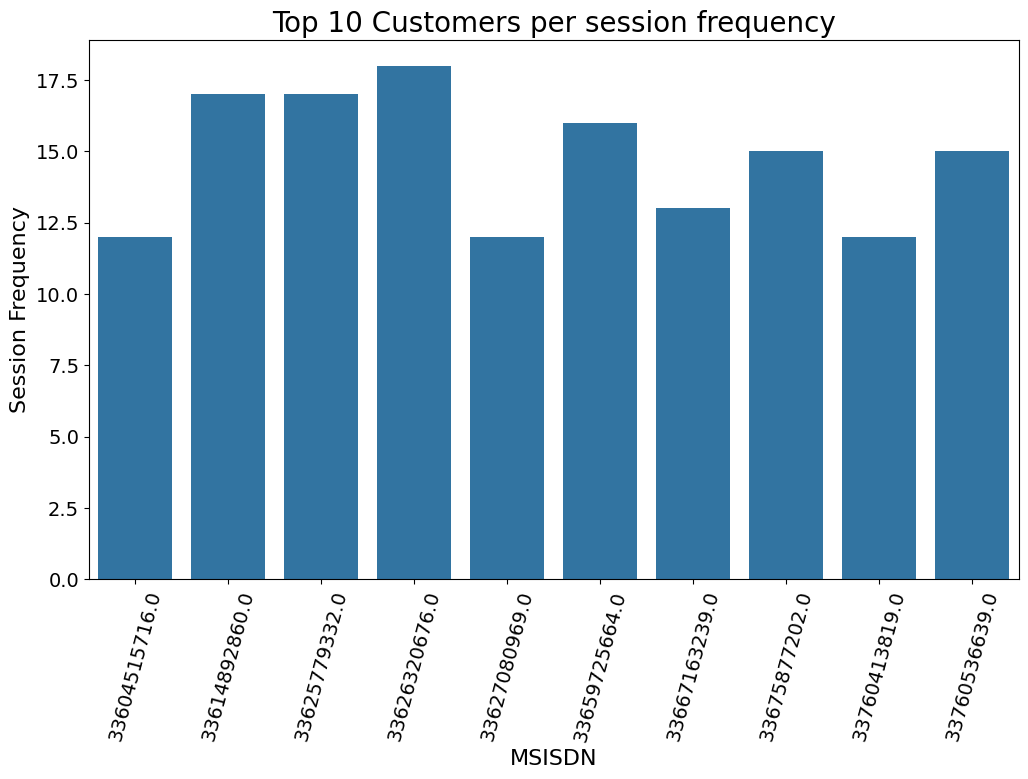

In [82]:
plot_bar(top_10_frequency, top_10_frequency["Customers"], top_10_frequency["SessionFrequency"], 'Top 10 Customers per session frequency', "MSISDN", "Session Frequency")

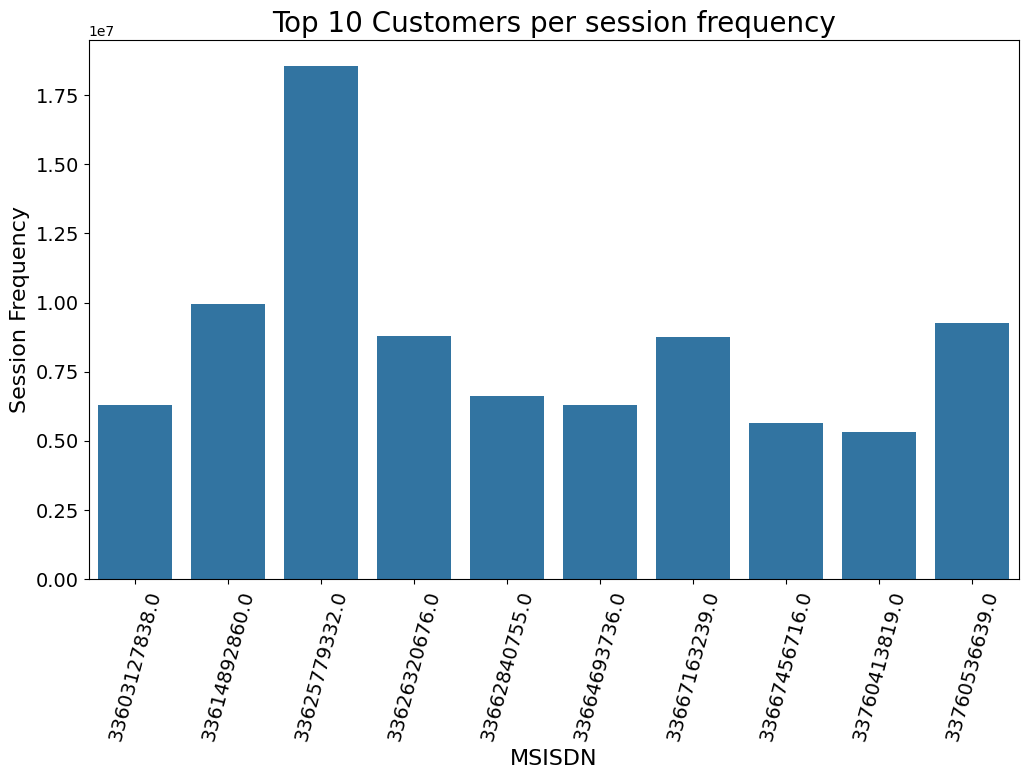

In [83]:
plot_bar(top_10_duration, top_10_duration["Customers"], top_10_duration["SessionDuration"], 'Top 10 Customers per session frequency', "MSISDN", "Session Frequency")

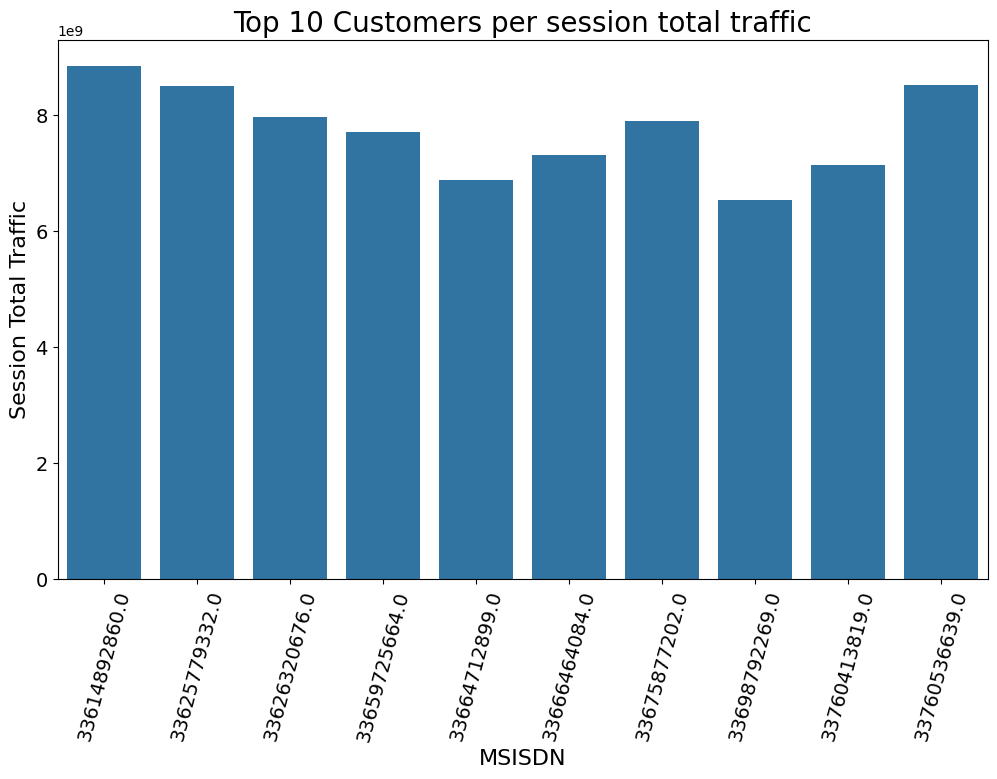

In [84]:
plot_bar(top_10_traffic, top_10_traffic["Customers"], top_10_traffic["SessionTotalTraffic"], 'Top 10 Customers per session total traffic', "MSISDN", "Session Total Traffic")

#### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

In [97]:
km = KMeans(n_clusters=3, n_init=10)
scaler2 = MinMaxScaler()
km

KMeans(n_clusters=3, n_init=10)

In [98]:
agg.head(2)

,Customers,SessionDuration,SessionFrequency,SessionTotalTraffic,cluster
0,3.360100e+10,116720.0,1,878690574.0,2
1,3.360100e+10,181230.0,1,156859643.0,2


In [102]:
#### Normalize each metric 
X = scaler2.fit_transform(agg[['SessionDuration', 'SessionFrequency', 'SessionTotalTraffic']])

## Cluster normalized metrics
y_predict = km.fit_predict(X)
y_predict

array([2, 2, 2, ..., 2, 2, 2])

In [103]:
# Cluster non normalized metrics
y_predicted = km.fit_predict(agg[['SessionDuration', 'SessionTotalTraffic', 'SessionFrequency']])
y_predicted

array([0, 2, 0, ..., 2, 0, 2])

In [110]:
agg['cluster'] = y_predict
agg.head(2)

,Customers,SessionDuration,SessionFrequency,SessionTotalTraffic,cluster
0,3.360100e+10,116720.0,1,878690574.0,2
1,3.360100e+10,181230.0,1,156859643.0,2


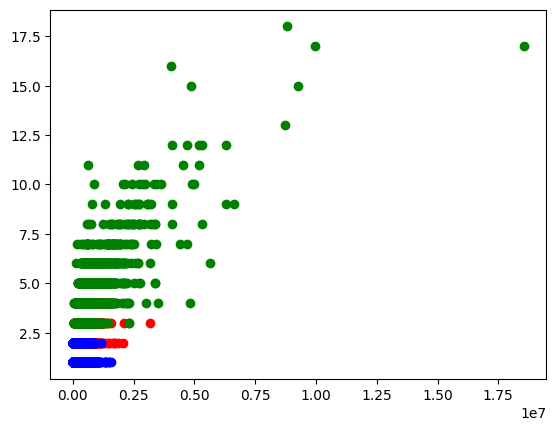

In [114]:
cluster1 = agg[agg['cluster']==0]
cluster2 = agg[agg['cluster']==1]
cluster3 = agg[agg['cluster']==2]
plt.scatter(cluster1['SessionDuration'], cluster1['SessionFrequency'], color = 'red')
plt.scatter(cluster2['SessionDuration'], cluster2['SessionFrequency'], color = 'green')
plt.scatter(cluster3['SessionDuration'], cluster3['SessionFrequency'], color = 'blue')
plt.show()

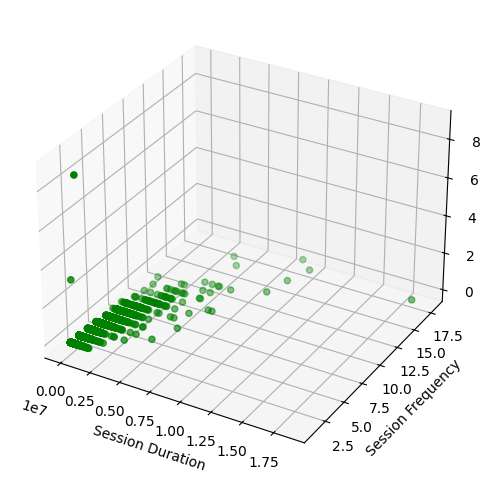

In [112]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract variables for plotting
x = agg['SessionDuration']
y = agg['SessionFrequency']
z = agg['Customers']

# Scatter plot
ax.scatter(x, y, z, c='green', marker='o')

# Set labels
ax.set_xlabel('Session Duration')
ax.set_ylabel('Session Frequency')
ax.set_zlabel('Customers')

# Show the plot
plt.show()

#### Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [115]:
agg.describe()

,Customers,SessionDuration,SessionFrequency,SessionTotalTraffic,cluster
count,1.068560e+05,1.068560e+05,106856.000000,1.068560e+05,106856.000000
mean,4.511474e+10,1.461672e+05,1.393792,6.909621e+08,1.557039
std,2.889423e+12,1.863587e+05,0.806022,4.910559e+08,0.807238
min,3.360100e+10,7.142000e+03,1.000000,3.324901e+07,0.000000
25%,3.365088e+10,7.130800e+04,1.000000,3.585499e+08,2.000000
50%,3.366365e+10,1.027400e+05,1.000000,6.179231e+08,2.000000
75%,3.368344e+10,1.727990e+05,2.000000,8.574351e+08,2.000000
max,8.823971e+14,1.855375e+07,18.000000,8.846226e+09,2.000000


#### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [ ]:
# Total traffic per application
df_num['Email'] = df_num['Email DL (Bytes)'] + df_num['Email UL (Bytes)']
df_num['Google'] = df_num["Google DL (Bytes)"] + df_num['Google UL (Bytes)']
df_num['Youtube'] = df_num["Youtube DL (Bytes)"] + df_num['Youtube UL (Bytes)']
df_num['Netflix'] = df_num["Netflix DL (Bytes)"] + df_num['Netflix UL (Bytes)']
df_num['Gaming'] = df_num["Gaming DL (Bytes)"] + df_num["Gaming UL (Bytes)"]
df_num['Social Media'] = df_num["Social Media DL (Bytes)"] + df_num["Social Media UL (Bytes)"]
df_num['Other'] = df_num["Other DL (Bytes)"] + df_num["Other UL (Bytes)"]


In [140]:
app = df_num.groupby('MSISDN/Number')[['Email', 'Youtube', 'Netflix', 'Gaming', 'Google', 'Social Media', 'Other']].sum()
app = app.reset_index()
app = app.drop('MSISDN/Number', axis=1).sum()
app.head()

Email      3.321447e+11
Youtube    3.328944e+12
Netflix    3.327057e+12
Gaming     6.326786e+13
Google     1.148016e+12
dtype: float64

In [146]:
top_3_apps = app.nlargest(3)
pd.DataFrame(top_3_apps)

,0
Gaming,6.326786e+13
Other,6.311197e+13
Youtube,3.328944e+12


#### Plot the top 3 most used applications using appropriate charts.  

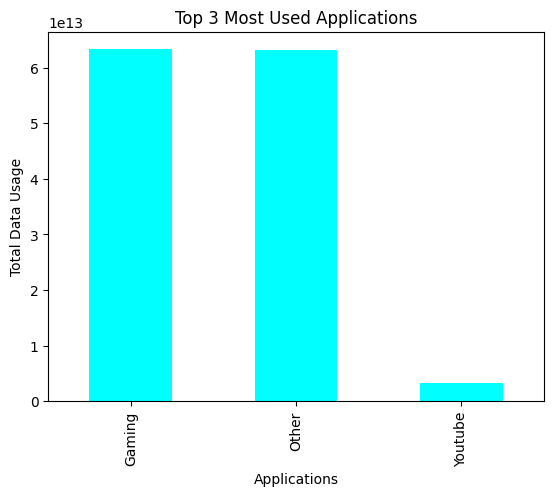

In [149]:
top_3_apps.plot(kind='bar', color='cyan')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Applications')
plt.ylabel('Total Data Usage')
plt.show()

The 3 most application used are:
- Gaming
- Other
- Youtube

####  Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable)

In [154]:
data = df.copy()

In [167]:
# Task4-1 Treatment of missing values

data['TCP DL Retrans. Vol (Bytes)'] = data['TCP DL Retrans. Vol (Bytes)'].fillna(data["TCP DL Retrans. Vol (Bytes)"].mean())
data['TCP UL Retrans. Vol (Bytes)'] = data['TCP UL Retrans. Vol (Bytes)'].fillna(data["TCP UL Retrans. Vol (Bytes)"].mean())

data["Avg RTT DL (ms)"] = data["Avg RTT DL (ms)"].fillna(data["Avg RTT DL (ms)"].mean())
data["Avg RTT UL (ms)"] = data["Avg RTT UL (ms)"].fillna(data["Avg RTT UL (ms)"].mean())

data['Handset Type'] = data['Handset Type'].fillna(data['Handset Type'].mode()[0])
